In [79]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import tensorflow.keras
import random
from scipy.stats import norm
import seaborn as sns
import math as m

In [28]:
df = pd.read_csv('lymph_data/zenodo_5727576.csv')
df.drop(columns=['pN', 'N+'], inplace=True)

In [30]:
target = df['Grading']
df.drop(columns=['Grading'], inplace=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,0:4] = scaler.fit_transform(df.iloc[:,0:4])

In [111]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(df, 
                                                                                  target,
                                                                                  test_size=0.3,
                                                                                  shuffle=True)

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(loss='absolute_error')
gbr = gbr.fit(train_data, train_label)
gbr_pred = gbr.predict(test_data)

In [154]:
from sklearn.metrics import accuracy_score
gbr_acc = accuracy_score(test_label, gbr_pred)
gbr_acc *= 100
str(np.round(gbr_acc,2)) + '%'

'63.64%'

In [132]:
test_label = np.array(test_label)

In [137]:
corr = 0
incorr = 0
for i in range(len(test_label)):
    if test_label[i] == gbr_pred[i]:
        corr += 1
    else:
        incorr += 1
print(corr, incorr)

21 12


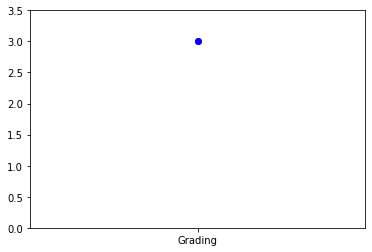

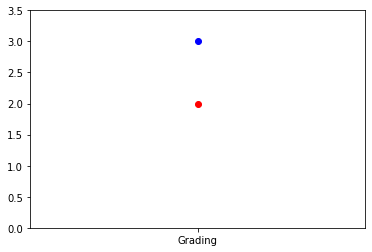

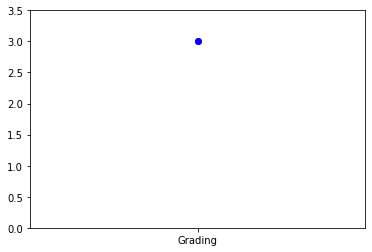

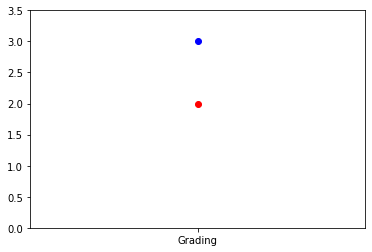

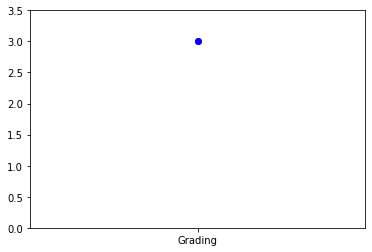

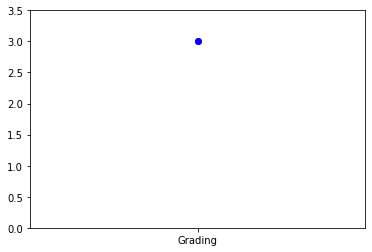

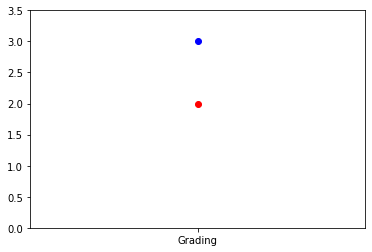

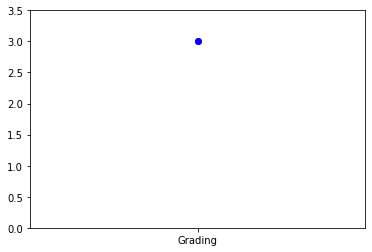

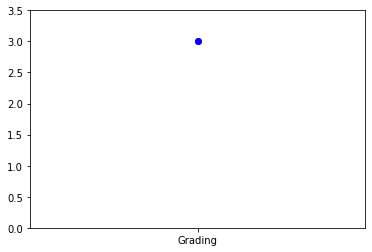

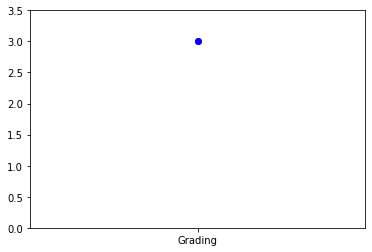

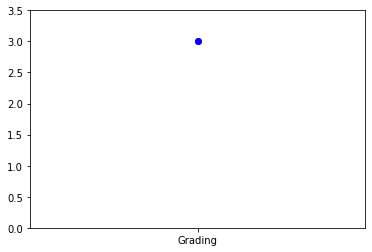

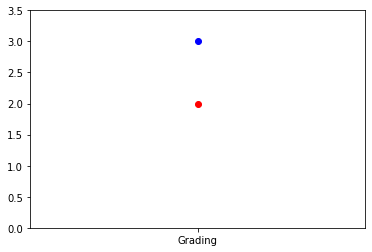

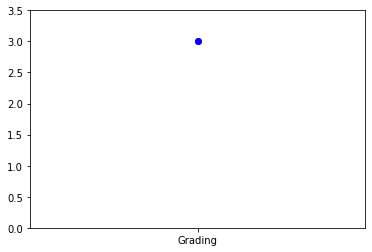

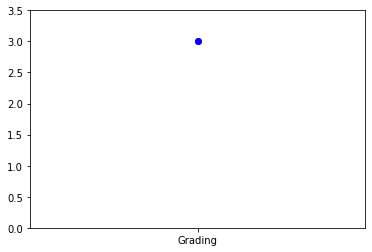

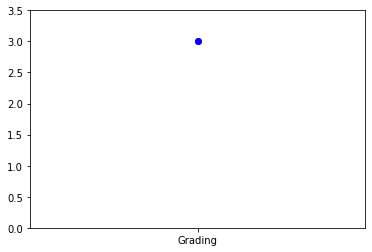

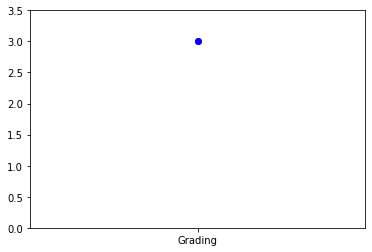

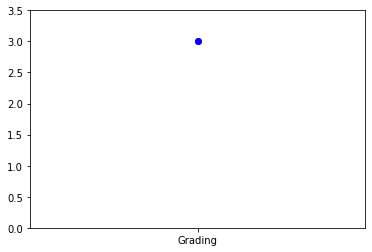

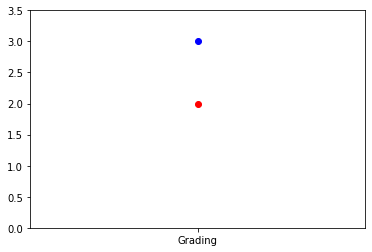

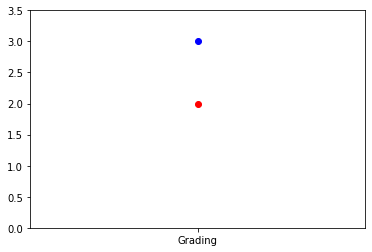

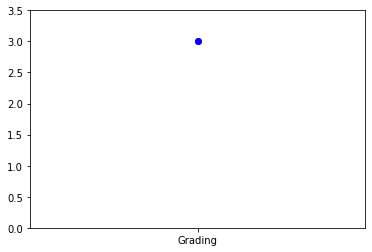

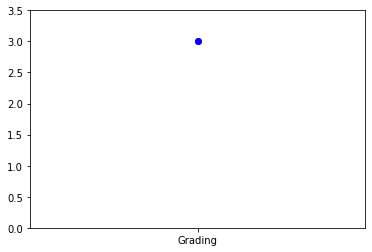

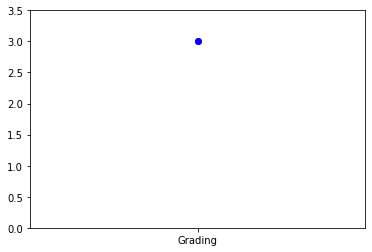

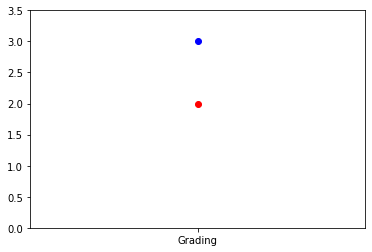

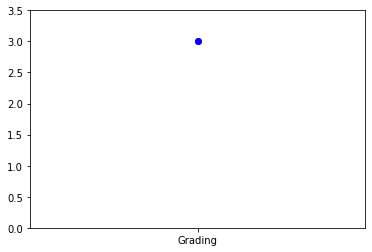

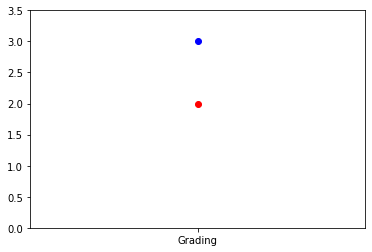

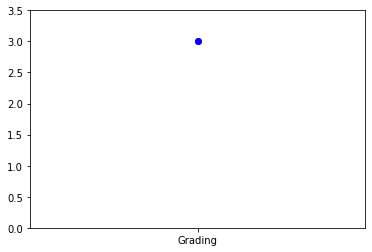

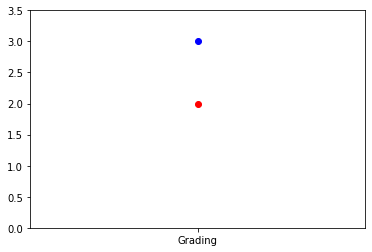

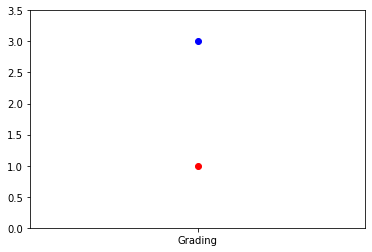

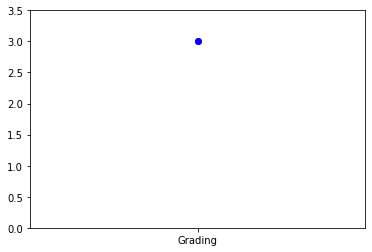

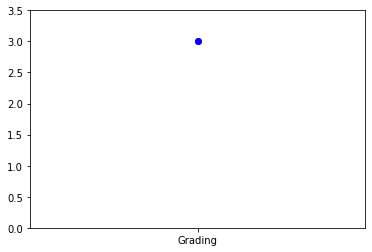

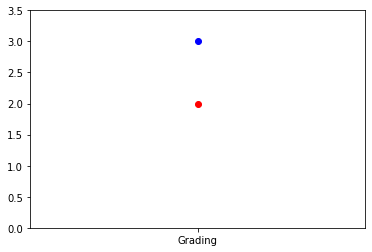

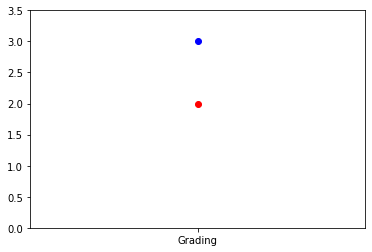

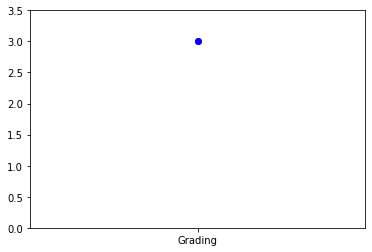

In [178]:
linespace = 'Grading'
for i in range(len(test_label)):
    plt.ylim(0, 3.5)
    plt.plot(linespace, test_label[i], 'ro')
    plt.plot(linespace, int(gbr_pred[i]), 'bo')
    plt.show()

In [151]:
int(gbr_pred[0])

3

In [175]:
from sklearn.linear_model import BayesianRidge
bayes = BayesianRidge()
bayes = bayes.fit(train_data, train_label)

In [176]:
bayes_pred = bayes.predict(test_data)

In [177]:
from sklearn.metrics import accuracy_score
bayes_acc = accuracy_score(test_label, np.round(bayes_pred))
bayes_acc *= 100
bayes_acc

63.63636363636363